In [1]:
import pandas as pd

df = pd.read_csv('./data/boston.csv')
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(None,
              CRIM          ZN       INDUS        CHAS          NX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
 50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
 75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
 std   

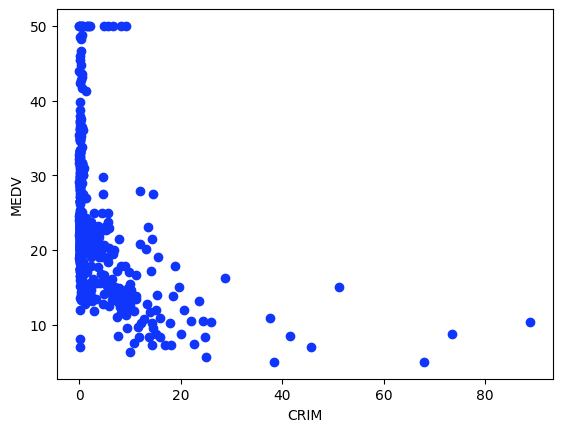

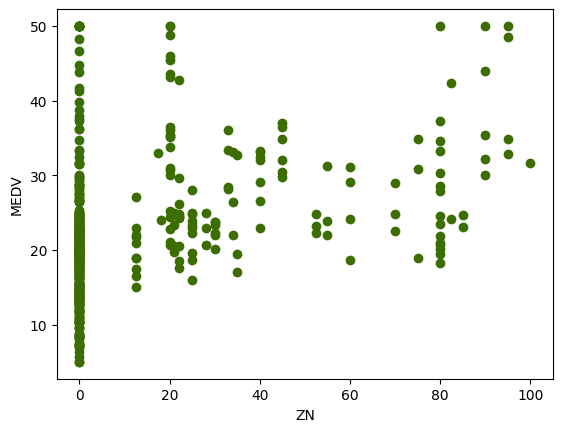

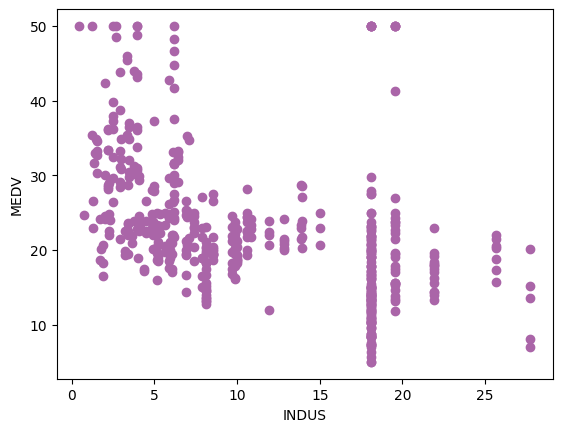

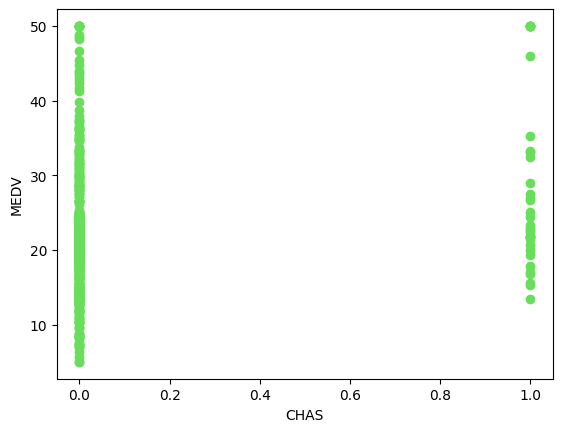

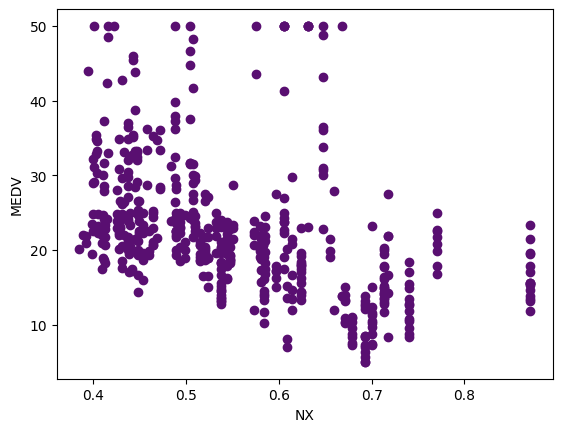

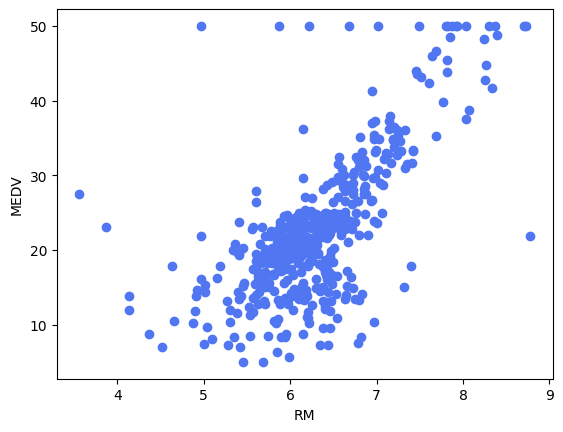

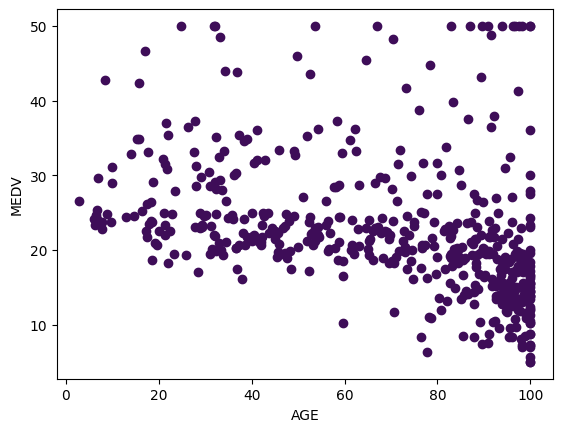

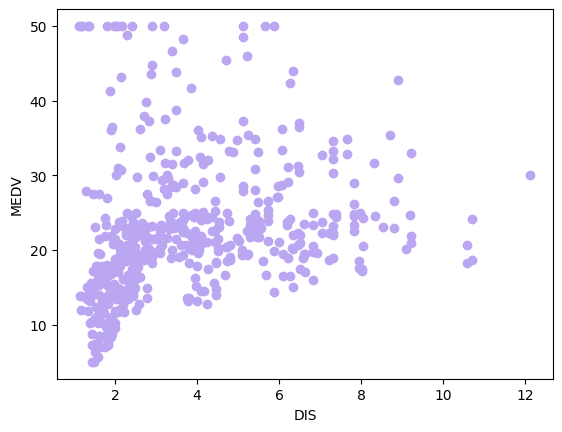

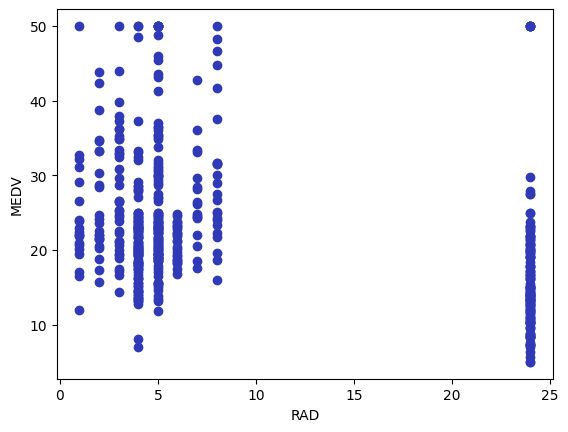

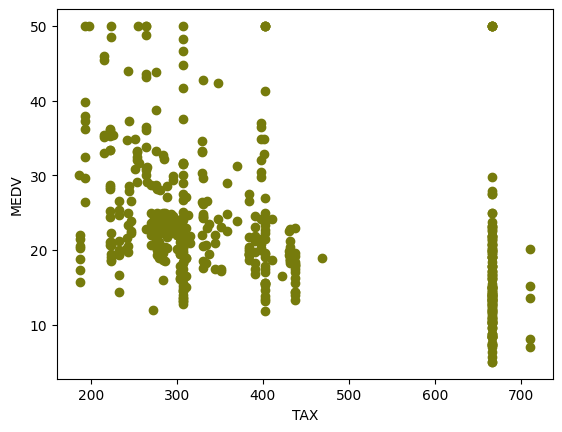

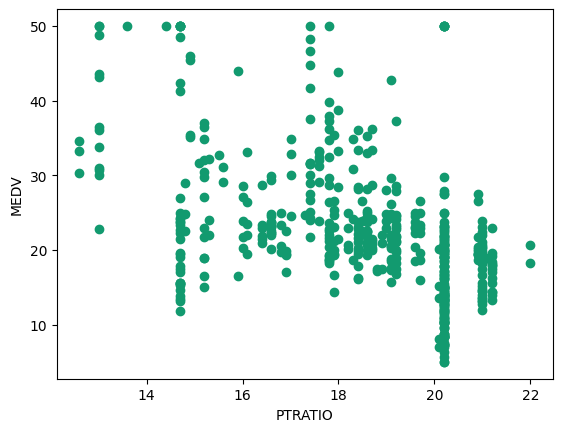

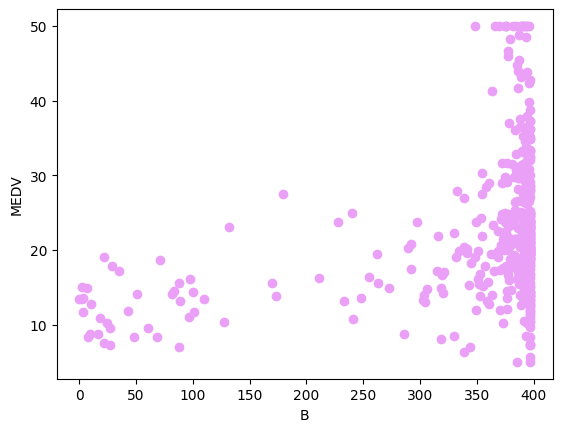

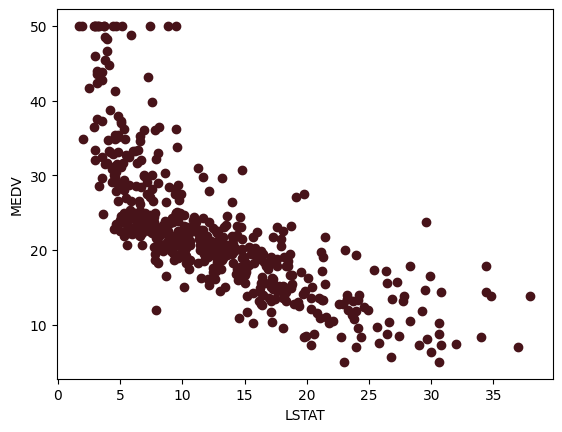

In [2]:
import matplotlib.pyplot as plt
import numpy as np

y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

for col in X.columns:
    # 生成随机颜色值
    color = np.random.rand(3)
    plt.scatter(df[col], y, color=color)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [3]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, y, test_size=0.2, random_state=33)


class Network(nn.Module):
    """
    网络结构:
    输入层
    隐藏层
    输出层
    """

    def __init__(self, n_in, n_hidden, n_out):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(n_in, n_hidden)
        self.layer2 = nn.Linear(n_hidden, n_hidden)

    def forward(self, x):
        z1 = self.layer1(x)
        a1 = torch.relu(z1)
        y = self.layer2(a1)
        return y


lr = 0.01
iterations = 100000
n_in = X_train.shape[1]
n_hidden = n_in
n_out = 1
model = Network(n_in, n_hidden, n_out)
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train.values).float().view(-1, 1)

for i in range(iterations):
    model.zero_grad()
    out = model(X_train_tensor)
    loss = criteria(out, y_train_tensor)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print('loss:', loss.item())

/Users/wuhonglei1/Desktop/人工智能/python/dh_ai/myenv/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([404, 1])) that is different to the input size (torch.Size([404, 13])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 606.0162963867188
loss: 14.811841011047363
loss: 9.157440185546875
loss: 7.261366367340088
loss: 5.918257236480713
loss: 4.569874286651611
loss: 3.792600154876709
loss: 3.2189626693725586
loss: 2.909832239151001
loss: 2.6955528259277344
loss: 2.5748612880706787
loss: 2.4859402179718018
loss: 2.3794777393341064
loss: 2.3296821117401123
loss: 2.293147325515747
loss: 2.2175955772399902
loss: 2.192042112350464
loss: 2.1750872135162354
loss: 2.162041425704956
loss: 2.1483561992645264
loss: 2.1368584632873535
loss: 2.1313939094543457
loss: 2.1267592906951904
loss: 2.121401786804199
loss: 2.1169774532318115
loss: 2.1135966777801514
loss: 2.1055259704589844
loss: 2.103189706802368
loss: 2.101186990737915
loss: 2.099504232406616
loss: 2.0980305671691895
loss: 2.0967068672180176
loss: 2.0955214500427246
loss: 2.0944700241088867
loss: 2.0935206413269043
loss: 2.092660665512085
loss: 2.0918843746185303
loss: 2.091198444366455
loss: 2.090517044067383
loss: 2.089914083480835
loss: 2.0893476009

In [7]:
# 模型评估
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test.values).float().view(-1, 1)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    loss = criteria(y_pred, y_test_tensor)
    print('test loss:', loss.item())

test loss: 22.551586151123047
